In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb


In [2]:
# Load Dataset
df=pd.read_csv(r"C:\Users\Jyoti\Documents\smartphone_addiction-dataset.csv",encoding="latin1")
print(df)

    1. Age 2. Gender    \
0    19-22      Female   
1    19-22      Female   
2    19-22        Male   
3    19-22      Female   
4    19-22      Female   
..     ...         ...   
695  19-22        Male   
696  19-22      Female   
697  19-22      Female   
698  19-22        Male   
699  15-18      Female   

    3. How many hours do you spend on your smartphone daily (on average)?    \
0                                            24 hours                        
1                                            46 hours                        
2                                            24 hours                        
3                                            46 hours                        
4                                            24 hours                        
..                                                 ...                        
695                                          46 hours                        
696                                          24 hours 

In [3]:
# Rename Class
df.columns = [
    "age",
    "gender",
    "daily_usage_hours",
    "primary_usage",
    "use_before_sleep",
    "anxiety_without_phone",
    "checks_per_hour",
    "impact_on_life",
    "time_without_checking",
    "self_addicted"
]


In [4]:
# Handling Missing Values
df['self_addicted'].fillna(df['self_addicted'].mode()[0], inplace=True)


C:\Users\Jyoti\AppData\Local\Temp\ipykernel_22212\942665712.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['self_addicted'].fillna(df['self_addicted'].mode()[0], inplace=True)


In [5]:
# 5. Encode Categorical Columns
# Daily Usage Hours
df["daily_usage_hours"] = np.where(
    df["daily_usage_hours"] == "Less than 2 hours", 1,
    np.where(df["daily_usage_hours"] == "2–4 hours", 3,
    np.where(df["daily_usage_hours"] == "4–6 hours", 5,
    np.where(df["daily_usage_hours"] == "More than 6 hours", 9, np.nan))))


In [6]:
# Checks Per Hour
df['checks_per_hour'] = np.where(
    df['checks_per_hour'] == "1–2 times", 2,
    np.where(df['checks_per_hour'] == "3–5 times", 4,
    np.where(df['checks_per_hour'] == "6–10 times", 8,
    np.where(df['checks_per_hour'] == "More than 10 times", 15, np.nan))))


In [7]:
# Time Without Checking
df['time_without_checking'] = np.where(
    df['time_without_checking'] == "Less than 15 minutes", 3,
    np.where(df['time_without_checking'] == "15–30 minutes", 2,
    np.where(df['time_without_checking'] == "30–60 minutes", 1,
    np.where(df['time_without_checking'] == "More than an hour", 0, np.nan))))


In [8]:
# Impact on Life
df['impact_on_life'] = np.where(
    df['impact_on_life'] == "Never", 0,
    np.where(df['impact_on_life'] == "Rarely", 1,
    np.where(df['impact_on_life'] == "Occasionally", 2,
    np.where(df['impact_on_life'] == "Yes, frequently", 3, np.nan))))


In [9]:
# Anxiety Without Phone
df['anxiety_without_phone'] = np.where(
    df['anxiety_without_phone'] == "Never", 0,
    np.where(df['anxiety_without_phone'] == "Rarely", 1,
    np.where(df['anxiety_without_phone'] == "Sometimes", 2,
    np.where(df['anxiety_without_phone'] == "Very often", 3, np.nan))))


In [10]:
# Age Encoding
df['age'] = np.where(
    df['age'] == "15-18", 16,
    np.where(df['age'] == "19-22", 20,
    np.where(df['age'] == "26-30", 26, np.nan)))


In [11]:
# Gender Encoding
df['gender'] = np.where(
    df['gender'] == "Male", 1,
    np.where(df['gender'] == "Female", 0, 2))


In [12]:
# Use Before Sleep
df['use_before_sleep'] = np.where(
    df['use_before_sleep'] == "Never", 0,
    np.where(df['use_before_sleep'] == "Rarely", 1,
    np.where(df['use_before_sleep'] == "Sometimes", 2, 3)))


In [13]:
# Target Variable Encoding
df['self_addicted'] = np.where(
    df['self_addicted'] == "Yes", 1,
    np.where(df['self_addicted'] == "No", 0, -1))


In [14]:
# 6. Drop Irrelevant Column
df.drop('primary_usage', axis=1, inplace=True)


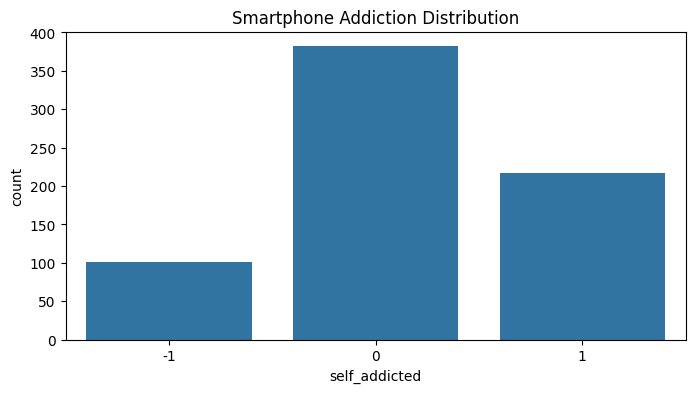

In [15]:
# 7. Visualizations
plt.figure(figsize=(8,4))
sb.countplot(x='self_addicted', data=df)
plt.title("Smartphone Addiction Distribution")
plt.show()


C:\Users\Jyoti\AppData\Local\Temp\ipykernel_22212\1878203446.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(data=df, x='age', palette='viridis')


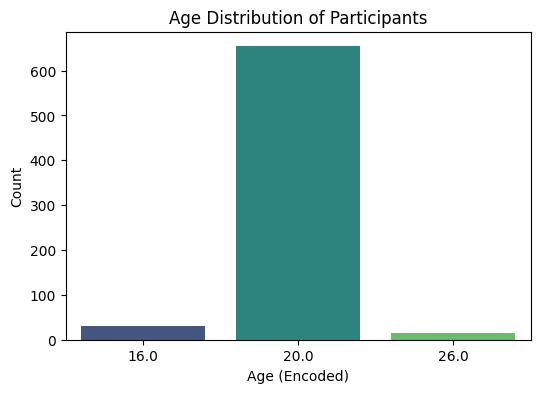

In [29]:
# 1. Distribution of Age & Gender (EDA)
# 📊 Gender Distribution
plt.figure(figsize=(6,4))
sb.countplot(data=df, x='age', palette='viridis')
plt.title("Age Distribution of Participants")
plt.xlabel("Age (Encoded)")
plt.ylabel("Count")
plt.show()


C:\Users\Jyoti\AppData\Local\Temp\ipykernel_22212\1623645246.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.boxplot(data=df, x='self_addicted', y='checks_per_hour', palette='pastel')


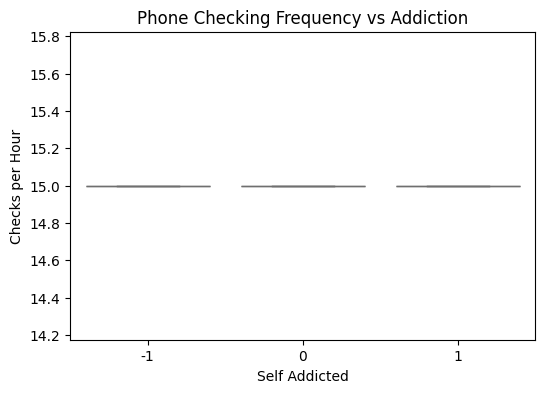

C:\Users\Jyoti\AppData\Local\Temp\ipykernel_22212\1623645246.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.boxplot(data=df, x='self_addicted', y='daily_usage_hours', palette='Set3')


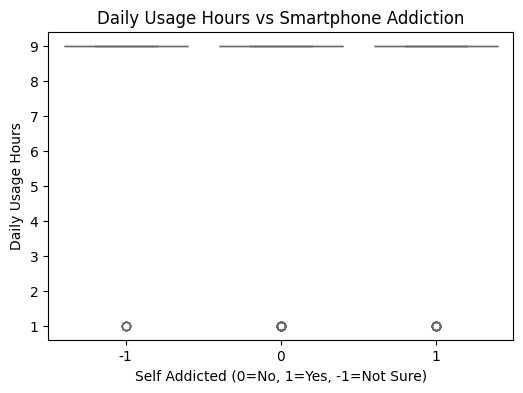

In [30]:
# 2. Smartphone Usage Behavior Analysis
# 📊 Checks per Hour vs Addiction
plt.figure(figsize=(6,4))
sb.boxplot(data=df, x='self_addicted', y='checks_per_hour', palette='pastel')
plt.title("Phone Checking Frequency vs Addiction")
plt.xlabel("Self Addicted")
plt.ylabel("Checks per Hour")
plt.show()

# Daily Usage Hours vs Addiction
plt.figure(figsize=(6,4))
sb.boxplot(data=df, x='self_addicted', y='daily_usage_hours', palette='Set3')
plt.title("Daily Usage Hours vs Smartphone Addiction")
plt.xlabel("Self Addicted (0=No, 1=Yes, -1=Not Sure)")
plt.ylabel("Daily Usage Hours")
plt.show()


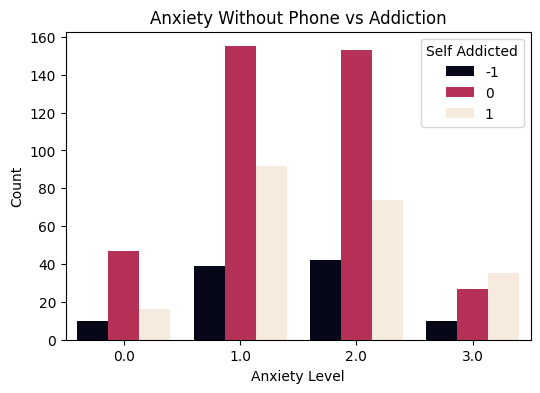

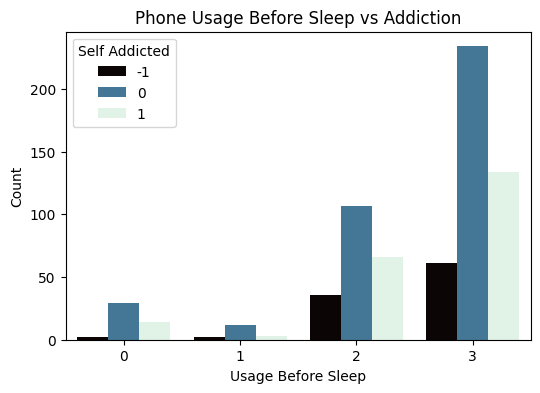

In [31]:
#3. Anxiety & Sleep Behavior
# Anxiety Without Phone
plt.figure(figsize=(6,4))
sb.countplot(data=df, x='anxiety_without_phone', hue='self_addicted', palette='rocket')
plt.title("Anxiety Without Phone vs Addiction")
plt.xlabel("Anxiety Level")
plt.ylabel("Count")
plt.legend(title="Self Addicted")
plt.show()


# Use Before Sleep
plt.figure(figsize=(6,4))
sb.countplot(data=df, x='use_before_sleep', hue='self_addicted', palette='mako')
plt.title("Phone Usage Before Sleep vs Addiction")
plt.xlabel("Usage Before Sleep")
plt.ylabel("Count")
plt.legend(title="Self Addicted")
plt.show()


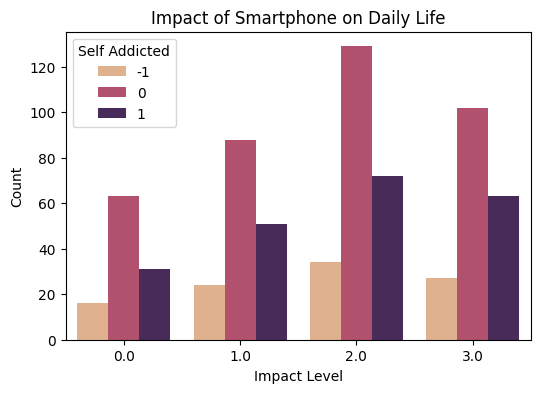

In [32]:
# 4. Impact on Daily Life
#Impact on Life vs Addiction
plt.figure(figsize=(6,4))
sb.countplot(data=df, x='impact_on_life', hue='self_addicted', palette='flare')
plt.title("Impact of Smartphone on Daily Life")
plt.xlabel("Impact Level")
plt.ylabel("Count")
plt.legend(title="Self Addicted")
plt.show()

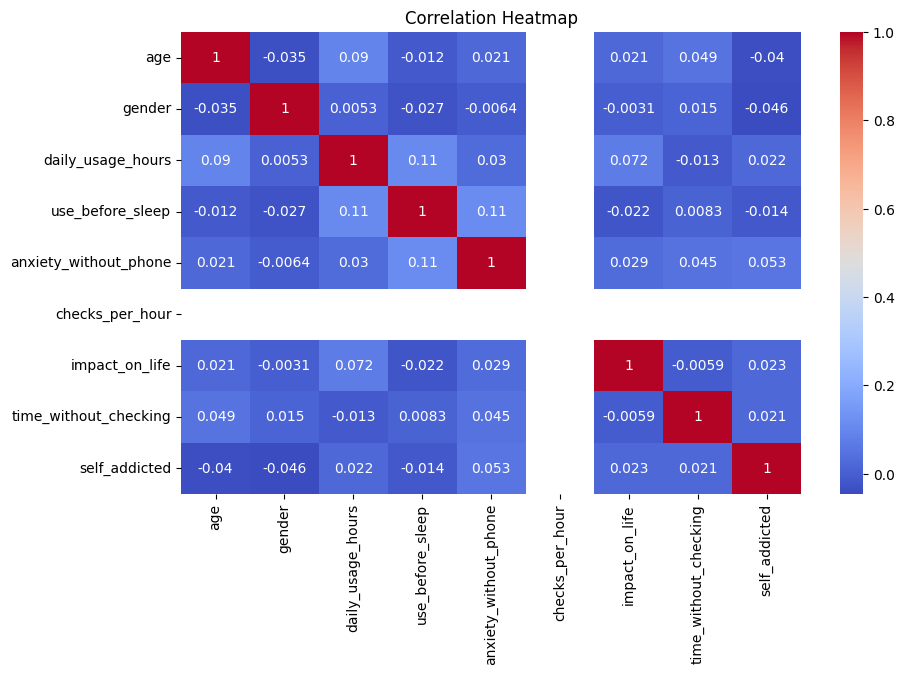

In [16]:
# Correlation Heatmap
plt.figure(figsize=(10,6))
sb.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [17]:
# 8. Train–Test Split
from sklearn.model_selection import train_test_split

X = df.drop('self_addicted', axis=1)
y = df['self_addicted']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [19]:
# 9. Machine Learning Models
# Check NaN
df.isna().sum()


age                        0
gender                     0
daily_usage_hours        455
use_before_sleep           0
anxiety_without_phone      0
checks_per_hour          539
impact_on_life             0
time_without_checking    216
self_addicted              0
dtype: int64

In [24]:
# Fill ALL Remaining NaN Values
df.fillna(df.median(numeric_only=True), inplace=True)



In [25]:
# Train–Test Split
from sklearn.model_selection import train_test_split

X = df.drop('self_addicted', axis=1)
y = df['self_addicted']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [22]:
# FEATURE SCALING
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [23]:
# 1. KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

print("KNN Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))


KNN Confusion Matrix:
 [[ 0 22  3]
 [ 0 69  8]
 [ 0 36  2]]
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00        25
           0       0.54      0.90      0.68        77
           1       0.15      0.05      0.08        38

    accuracy                           0.51       140
   macro avg       0.23      0.32      0.25       140
weighted avg       0.34      0.51      0.39       140



C:\Users\Jyoti\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Jyoti\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Jyoti\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\metrics\_clas

In [26]:
# 2.Logistic Regression

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Logistic Regression Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


Logistic Regression Confusion Matrix:
 [[ 0 23  2]
 [ 0 74  3]
 [ 0 37  1]]
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00        25
           0       0.55      0.96      0.70        77
           1       0.17      0.03      0.05        38

    accuracy                           0.54       140
   macro avg       0.24      0.33      0.25       140
weighted avg       0.35      0.54      0.40       140



C:\Users\Jyoti\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Jyoti\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Jyoti\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\metrics\_clas

In [27]:
# 3.Decision Tree
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("Decision Tree Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))


Decision Tree Confusion Matrix:
 [[ 4 18  3]
 [11 47 19]
 [ 4 26  8]]
              precision    recall  f1-score   support

          -1       0.21      0.16      0.18        25
           0       0.52      0.61      0.56        77
           1       0.27      0.21      0.24        38

    accuracy                           0.42       140
   macro avg       0.33      0.33      0.33       140
weighted avg       0.39      0.42      0.40       140



In [28]:
# Cross-Validation
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lr, X_train, y_train, cv=5)
print("Cross-Validation Scores:", scores)
print("Average Accuracy:", scores.mean())


Cross-Validation Scores: [0.52678571 0.54464286 0.54464286 0.54464286 0.53571429]
Average Accuracy: 0.5392857142857143
